In [1]:
%env BIGML_USERNAME=vignesh2108
%env BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25

env: BIGML_USERNAME=vignesh2108
env: BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25


In [2]:
from bigml.api import BigML
import pandas as pd
from pandas.io import gbq
import json

In [9]:
news_content = """SELECT title  FROM [not-a-doctor-273222.Topic_Modelling.NewsData]"""
news_content = gbq.read_gbq(news_content,project_id="not-a-doctor-273222")

/Users/vignesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  
Downloading: 100%|██████████| 2023/2023 [00:00<00:00, 5844.84rows/s]


In [10]:
news_content_uniq=news_content.drop_duplicates()

In [13]:
news_content_uniq.to_csv('news_cont_uniq.csv',index=False)

In [4]:
api = BigML()

In [5]:
source = api.create_source("news_cont_uniq.csv")

In [6]:
api.ok(source)

True

In [7]:
dataset = api.create_dataset(source)

In [8]:
api.ok(dataset)

True

In [9]:
topic_model = api.create_topic_model(dataset, { \
    "name": "TopNewsTopics"
        , "excluded_terms":["coronavirus","covid","rand"]
        ,"term_filters": ["non_language_characters","html_keywords","numeric_digits"]
#       ,"number_of_topics":15
})

In [10]:
api.ok(topic_model)

True

In [11]:
for i in topic_model['object']['topic_model']['topics']:
    print(i['name'])
    


johnson
updates
trump, week
lockdown
dies
checks
trump, rise
restrictions
death
report
pandemic, million
governor
trump, thehill
testing
business
china
relief
pandemic, health
york
home


In [23]:
topiclist=[]
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+" "+str(t['top_terms'][1][0])
    else:
        s1=str(t['name'])
    topiclist.append(s1)

In [111]:
file1 = open("FinalTopicsOP.txt","w") 

In [112]:
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+" "+str(t['top_terms'][1][0])+"\n"
    else:
        s1=str(t['name'])+"\n"
    file1.write(s1)
file1.close()

In [17]:
probslist=[]
for i in topic_model['object']['topic_model']['topics']:
    probslist.append(i['probability'])

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import squarify

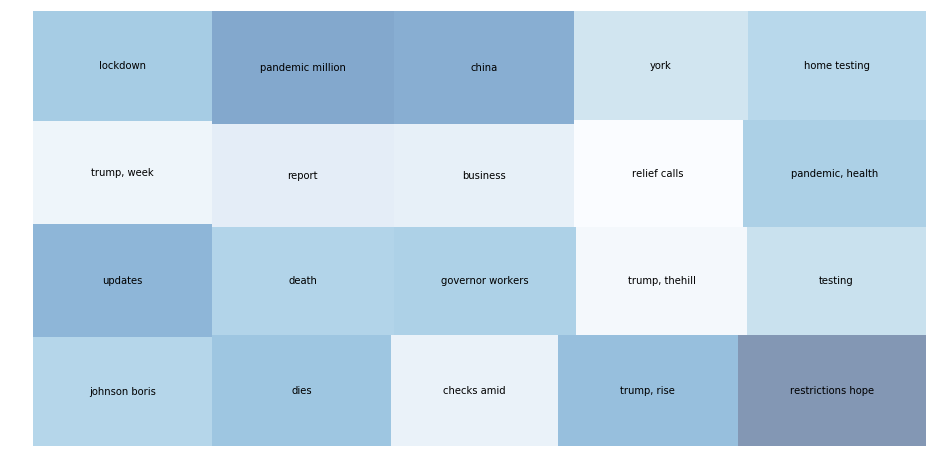

In [40]:
norm = matplotlib.colors.Normalize(vmin=min(probslist), vmax=max(probslist))
colors = [matplotlib.cm.Blues(norm(value)) for value in probslist]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
squarify.plot(sizes=probslist, label=topiclist, color=colors, alpha=.5 )
plt.axis('off')
plt.show()
